# Importing Libraries

In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

# Importing DataSet

In [2]:
dataset = pd.read_csv(r'C:\Users\Nkmanithia\OneDrive\Desktop\New folder\Book1.csv')
dataset


,Country,age,salary,purchase
0,france,44.0,7200.0,no
1,spain,27.0,4800.0,yes
2,germany,30.0,5400.0,no
3,spain,38.0,6100.0,no
4,germany,40.0,NaN,yes
5,france,35.0,5800.0,yes
6,spain,NaN,5200.0,no
7,france,48.0,7900.0,yes
8,germany,50.0,8300.0,no
9,france,37.0,6700.0,yes


In [3]:
#independent Variable 
x = dataset.iloc[:,:-1].values
print (x)

[['france' 44.0 7200.0]
 ['spain' 27.0 4800.0]
 ['germany' 30.0 5400.0]
 ['spain' 38.0 6100.0]
 ['germany' 40.0 nan]
 ['france' 35.0 5800.0]
 ['spain' nan 5200.0]
 ['france' 48.0 7900.0]
 ['germany' 50.0 8300.0]
 ['france' 37.0 6700.0]]


In [4]:
#depentdent Variable
y = dataset.iloc[:,-1].values
print(y)

['no' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'yes']


# Missing Data

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer( missing_values = np.nan, strategy = 'mean')# mean mode median constant #fill_value
imputer.fit(x[:,1:-1])
x[:,1:-1] = imputer.transform(x[:,1:-1])

In [6]:
print(x)

[['france' 44.0 7200.0]
 ['spain' 27.0 4800.0]
 ['germany' 30.0 5400.0]
 ['spain' 38.0 6100.0]
 ['germany' 40.0 nan]
 ['france' 35.0 5800.0]
 ['spain' 38.77777777777778 5200.0]
 ['france' 48.0 7900.0]
 ['germany' 50.0 8300.0]
 ['france' 37.0 6700.0]]


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   10 non-null     object 
 1   age       9 non-null      float64
 2   salary    9 non-null      float64
 3   purchase  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


Independent Encoding 

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [9]:
ct = ColumnTransformer(transformers = [('',OneHotEncoder(sparse=False),[0])])
z=ct.fit_transform(x)
print(z)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [10]:
ct = ColumnTransformer(transformers = [('',OneHotEncoder(),[0])],remainder = 'passthrough')
z=ct.fit_transform(x)
print(z)

[[1.0 0.0 0.0 44.0 7200.0]
 [0.0 0.0 1.0 27.0 4800.0]
 [0.0 1.0 0.0 30.0 5400.0]
 [0.0 0.0 1.0 38.0 6100.0]
 [0.0 1.0 0.0 40.0 nan]
 [1.0 0.0 0.0 35.0 5800.0]
 [0.0 0.0 1.0 38.77777777777778 5200.0]
 [1.0 0.0 0.0 48.0 7900.0]
 [0.0 1.0 0.0 50.0 8300.0]
 [1.0 0.0 0.0 37.0 6700.0]]


Dependent Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder 
v = LabelEncoder()
v.fit_transform(x[:,0])

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0])

In [4]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
import opendatasets as od
dataset_url ='https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps'
od.download(dataset_url)

Skipping, found downloaded files in ".\google-playstore-apps" (use force=True to force download)


In [6]:
gp=pd.read_csv(r"C:\Users\Nkmanithia\google-playstore-apps\Google-Playstore.csv")

In [7]:
gp.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [8]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [9]:
gp.isnull().sum().sort_values()

Scraped Time              0
App Id                    0
Category                  0
In App Purchases          0
Ad Supported              0
Content Rating            0
Last Updated              0
Maximum Installs          0
Free                      0
Price                     0
Editors Choice            0
App Name                  2
Developer Email          31
Developer Id             33
Minimum Installs        107
Installs                107
Currency                135
Size                    196
Minimum Android        6530
Rating Count          22883
Rating                22883
Released              71053
Privacy Policy       420953
Developer Website    760835
dtype: int64

In [10]:
gp.dropna(subset=['Released','Rating','Rating Count','Minimum Android','Size','Currency','Installs','Minimum Installs','Developer Id','Developer Email','App Name'],inplace=True)

In [11]:
gp.shape

(2235253, 24)

In [12]:
gp.isnull().sum().sort_values()


App Name                  0
In App Purchases          0
Ad Supported              0
Content Rating            0
Last Updated              0
Released                  0
Developer Email           0
Developer Id              0
Minimum Android           0
Editors Choice            0
Size                      0
Price                     0
Free                      0
Maximum Installs          0
Minimum Installs          0
Installs                  0
Rating Count              0
Rating                    0
Category                  0
App Id                    0
Currency                  0
Scraped Time              0
Privacy Policy       405441
Developer Website    740565
dtype: int64

In [13]:
gp['Installs'].str.split("+").str[0]

0             10
1          5,000
2             50
3             10
4            100
           ...  
2312938    1,000
2312940      100
2312941      100
2312942    1,000
2312943      100
Name: Installs, Length: 2235253, dtype: object

In [14]:
gp1=pd.read_csv(r"C:\Users\Nkmanithia\google-playstore-apps\Google-Playstore.csv")

In [15]:
gp1['Installs'] = gp1['Installs'].str.split("+").str[0]

In [16]:
gp1.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [19]:
gp.Category.unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

(array([324068., 243658., 330675., 239383., 551042., 275650., 122320.,
         46705.,  75050.,  26702.]),
 array([ 0. ,  4.7,  9.4, 14.1, 18.8, 23.5, 28.2, 32.9, 37.6, 42.3, 47. ]),
 <BarContainer object of 10 artists>)

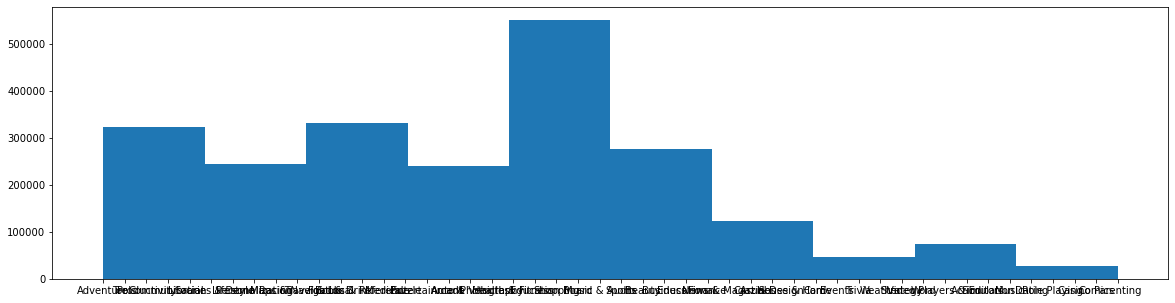

In [21]:
plt.figure(figsize=(20,5))
plt.hist(gp.Category)